In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("ValueCo data extract - ENSAE research project.csv")

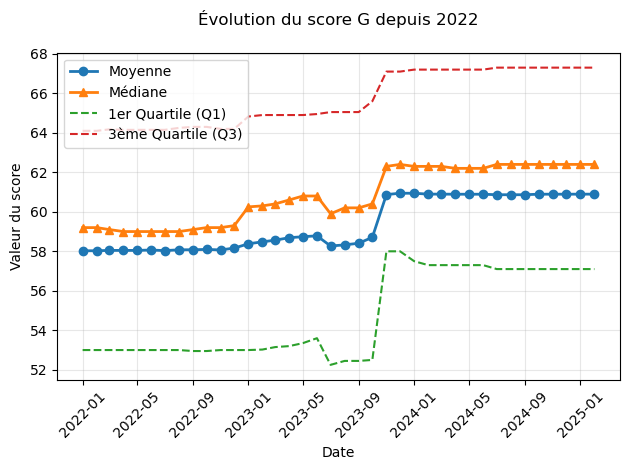

In [37]:
df['period'] = pd.to_datetime(df['period'])  # Conversion explicite en datetime

# 2. Sélection du score
score = input("Quel score analyser ? (E/S/G) ").upper()

# 3. Filtrer les données
df_score = df[df['score_kind'] == score].sort_values('period')

if df_score.empty:
    print(f"Aucune donnée pour le score {score}")
    exit()

# 4. Forcer le début à 2022-01-01 (en Timestamp)
date_debut = pd.to_datetime('2022-01-01')
df_score = df_score[df_score['period'] >= date_debut]  # Comparaison entre Timestamps

# 5. Calcul des statistiques
stats = df_score.groupby('period')['consensus'].agg(
    ['mean', 'median', lambda x: x.quantile(0.25), lambda x: x.quantile(0.75)]
)
stats.columns = ['Moyenne', 'Médiane', 'Q1', 'Q3']

# 6. Création du graphique
plt.plot(stats.index, stats['Moyenne'], label='Moyenne', color='#1f77b4', linewidth=2, marker='o')
plt.plot(stats.index, stats['Médiane'], label='Médiane', color='#ff7f0e', linewidth=2, marker='^')
plt.plot(stats.index, stats['Q1'], label='1er Quartile (Q1)', linestyle='--', color='#2ca02c', linewidth=1.5)
plt.plot(stats.index, stats['Q3'], label='3ème Quartile (Q3)', linestyle='--', color='#d62728', linewidth=1.5)

# 7. Personnalisation
plt.title(f'Évolution du score {score} depuis 2022', pad=20)
plt.xlabel('Date')
plt.ylabel('Valeur du score')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()

# 8. Affichage
plt.show()

In [22]:
plot_esg_stats("/home/onyxia/work/Statapp_Valuco/ValueCo data extract - ENSAE research project.csv", score_kind='G')

/tmp/ipykernel_12116/1960231238.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_grouped = df.groupby(pd.Grouper(key='period', freq='M'))[score_kind]


KeyError: 'Column not found: G'

In [1]:
import pandas as pd

# 1. Lire toutes les feuilles
with pd.ExcelFile("/home/onyxia/work/Statapp_Valuco/ValueCo V2.xlsx") as excel:
    # Afficher les noms des feuilles
    print("Feuilles disponibles:", excel.sheet_names)
    
    # 2. Parcourir chaque feuille
    for sheet_name in excel.sheet_names:
        print(f"\n● Feuille: {sheet_name}")
        
        # Lire la feuille
        df = pd.read_excel(excel, sheet_name=sheet_name)
        
        # Afficher les colonnes
        print("Colonnes:", df.columns.tolist())
        
        # Aperçu des données (optionnel)
        print("Aperçu:")
        print(df.head(2))

ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.